In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from prepare_data import prepare, preprocess

In [3]:
DATA_PATH = 'data/fire_archive_2017.json'

In [4]:
df_fire_lean = prepare(DATA_PATH)

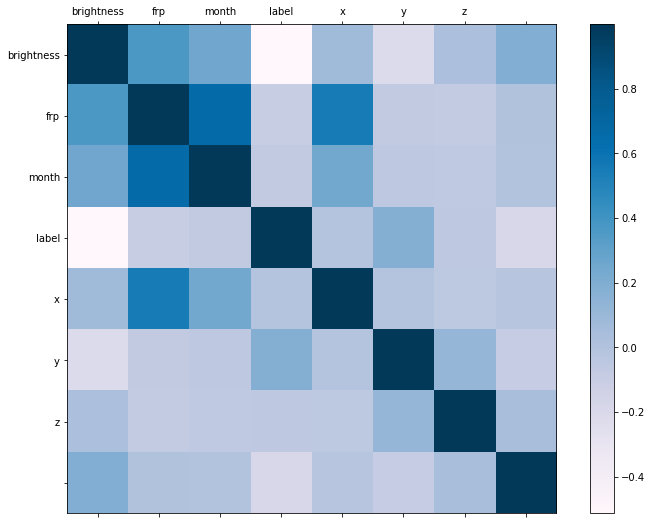

In [5]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)
cax = ax.matshow(df_fire_lean.corr(), cmap=plt.cm.get_cmap('PuBu'))
fig.colorbar(cax)
ax.set_xticklabels(df_fire_lean.columns)
ax.set_yticklabels(df_fire_lean.columns)

plt.show()

In [41]:
X_train, y_train, X_test, y_test, scaler, ohe, scaled_cols = preprocess(df_fire_lean, over_sample=False)

/Users/victor/.pyenv/versions/3.5.0/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/victor/.pyenv/versions/3.5.0/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [42]:
X_train.shape, y_train.shape

((7862, 15), (7862,))

<h1>Gradient Boosting</h1>

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
gbc = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=0)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

<h1>SVC</h1>

In [45]:
from sklearn.svm import SVC

In [46]:
svc = SVC(gamma='scale')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<h1>Random Forest</h1>

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier(n_estimators=350, max_depth=5, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
y_train_pred_gbc = gbc.predict(X_train)
y_train_pred_svc = svc.predict(X_train)
y_train_pred_rfc = rfc.predict(X_train)
X_test[scaled_cols] = scaler.transform(X_test[scaled_cols])
X_test = ohe.transform(X_test)
y_test_pred_gbc = gbc.predict(X_test)
y_test_pred_svc = svc.predict(X_test)
y_test_pred_rfc = rfc.predict(X_test)

In [51]:
print("Accuracy Score:")
print("(GBC) Training Data {0}".format(accuracy_score(y_train, y_train_pred_gbc)))
print("(GBC) Test Data {0}".format(accuracy_score(y_test, y_test_pred_gbc)))
print("(SVC) Training Data {0}".format(accuracy_score(y_train, y_train_pred_svc)))
print("(SVC) Test Data {0}".format(accuracy_score(y_test, y_test_pred_svc)))
print("(RFC) Training Data {0}".format(accuracy_score(y_train, y_train_pred_rfc)))
print("(RFC) Test Data {0}".format(accuracy_score(y_test, y_test_pred_rfc)))

Accuracy Score:
(GBC) Training Data 0.9539557364538286
(GBC) Test Data 0.8925982449446777
(SVC) Training Data 0.8702620198422794
(SVC) Test Data 0.8723769553605494
(RFC) Training Data 0.8791656067158484
(RFC) Test Data 0.8784814956123617


In [ ]:
import pickle

s = pickle.dump(gbc, open('./classifier.pkl', 'wb'))